# Logistic regression

## Part 1: Training a logistic regression model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import randint
import seaborn as sns
sns.set_theme()

The sigmoïd function is defined by:

\begin{align}
\sigma(x)=\frac{1}{1+\exp(-x)}.
\end{align}
    
**Question 1:** Display the sigmoïd function.

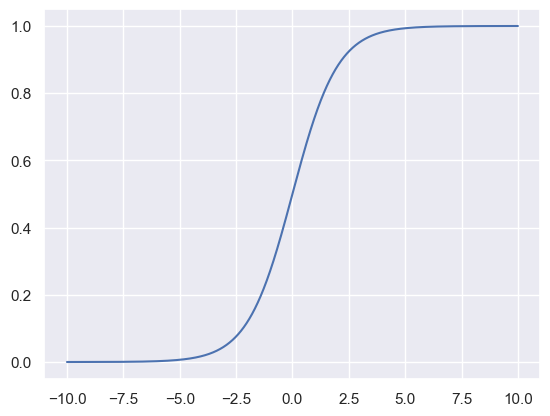

In [5]:
# 
x = np.linspace(-10,10,10000)
y = 1/(1+np.exp(-x))
plt.plot(x,y)

We consider the following functions for dataset generation of the previous session:

In [6]:
def covariance(sigma1=1., sigma2=1., theta=0.):
    """
        Covariance matrix with eigenvalues sigma1 and sigma2, rotated by the angle theta.
    """
    rotation = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    cov = np.array([[sigma1, 0.],
                   [0, sigma2]])
    return rotation.dot(cov.dot(rotation.T))

def gaussian_sample(mu=[0, 0], sigma1=1., sigma2=1., theta=0., n=50):
    cov = covariance(sigma1, sigma2, theta)
    x = multivariate_normal.rvs(mean=mu, cov=cov, size=n)
    return x

**Question 2:** Display a few samples and propose a solution to incorporate an affine bias term to a linear model.

(100, 2)


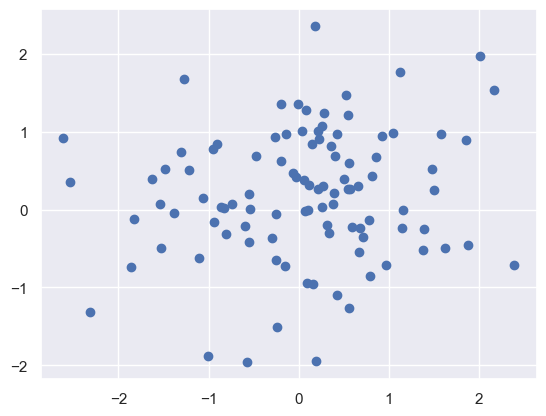

(100, 2)


c:\Users\mathi\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:657: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


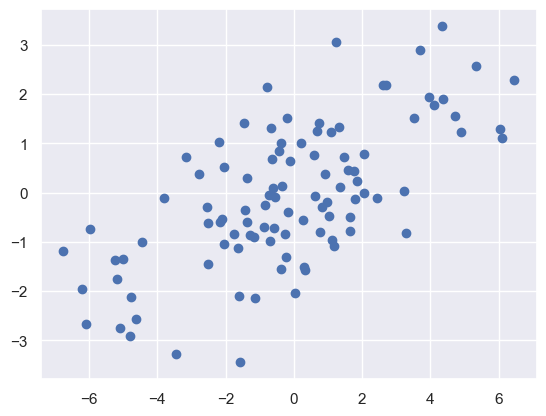

In [19]:
# Answer
x = gaussian_sample(n=100)
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

x = gaussian_sample(sigma1=10, sigma2=-1, theta=60, n=100)
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

One of the most popular model in
   $\mathbb{R}^p$ is probably the **logistic model**, where
   $$
   \mathbb{P}[Y=1|X=x]={\exp\left(\langle \beta^\star,x\rangle\right)\over 1+\exp\left(\langle \beta^\star,x\rangle\right)}\quad \textrm{for all}\ x\in\mathbb{R}^p,
   $$
   with $\beta^\star\in\mathbb{R}^p$. In this case, we have
   $\mathbb{P}[Y=1|X=x]>1/2$ if and only if $\langle \beta^\star,x\rangle>0$, so
   the frontier between $\left\{x \in \mathbb R^p : \mathscr{C}^\star(x)=1\right\}$ and
   $\left\{x \in \mathbb R^p : \mathscr{C}^\star(x)=0\right\}$ is a linear boundary, normal to $\beta^*$.

We can estimate the parameter $\beta^\star$ by maximizing the conditional likelihood of $(Y_1, \dots, Y_n)$ given that $(X_1, \dots, X_n) = (x_1, \dots, x_n)$.

**Question 3a:** Give the conditional likelihood that the logistic regression must maximize as well as the Bayes classifier.


**Answer:**
The conditionnal likelihood that the logistic regression must maximimize is: <br>
$$ L(\beta) = \prod{Y_i \exp\left(\langle \beta^\star,x_{i}\rangle\right)\over 1+\exp\left(\langle \beta^\star,x_{i}\rangle\right)}\quad  $$
The bayes classifier is $$ \mathbb{1}\{\mathbb{P}(Y=1|X=x) > 0.5\} $$

In fact, we will rather consider the neg-log-likelihood $\ell_{n}(\beta)$ which is much easier to study. We might omit to write the dependency in $X,Y$.
    
**Question 3b:** We remind that $\ell_n$ is obtained via:
   	$$
   	\ell_{n}(\beta)= -\sum_{i=1}^n\left[Y_{i}\langle x_{i},\beta\rangle-\log(1+\exp(\langle x_{i},\beta\rangle))\right]
    = -\sum_{i=1}^n\left[Y_{i}\langle x_{i},\beta\rangle+\log( \sigma(-\langle x_{i},\beta\rangle) )\right].
   	$$
Compute  the gradient $\nabla\ell_{n}(\beta)$ and the Hessian $H_{n}(\beta)$ of $\ell_n$.

**Answer:**
$\nabla\ell_{n}(\beta)=-\sum_{i=1}^n x_{i}^T(Y_{i} - \frac{\exp(x_{i}^T \beta)}{1+\exp(x_{i}^T \beta)}) = -\sum_{i=1}^n x_{i}^T(Y_{i} - \sigma(-x_{i}^T \beta)) $<br>
$H_{n}(\beta) = -\sum_{i=1}^n  \sigma(-x_{i}^T \beta)(1-\sigma(-x_{i}^T \beta))  x_{i}  x_{i}^T  $

**Question 4:** What can be said about $\ell_n$?

**Answer:**
We can say that l_n has a unique minimum as the function is convex.

**Question 5**: Implement three functions to compute $\ell_{n}(\beta)$, $\nabla\ell_{n}(\beta)$ and the Hessian $H_{n}(\beta)$ for $\beta\in \mathbb{R}^d$ and a given training set $(X,Y)$.

In [22]:
# Answer
def value_loglikelihood(X,Y,beta):
    in_prod = X.T@beta
    res = np.sum(Y*in_prod - np.log(1+np.exp(in_prod)))
    return res
    
def gradient(X,Y,beta):
    pass

**_Hint:_** Test your implementation:

In [23]:
x = gaussian_sample()
y = 
epsilon=0.000001
beta=np.random.normal(size=3)
beta_p=np.copy(beta)
beta_p[0]+=epsilon
print('Value at a random point (must be non-negative)')
print(value_loglikelihood(beta,X,Y))
# test grad
print('Gradient first coordinate')
print((value_loglikelihood(beta_p,X,Y)-value_loglikelihood(beta,X,Y))/epsilon)
print(gradient_loglikelihood(beta,X,Y)[0])
# test hessian
print('Hessian first coordinates')
print((gradient_loglikelihood(beta_p,X,Y)[0]-gradient_loglikelihood(beta,X,Y)[0])/epsilon)
print(hessian_loglikelihood(beta,X,Y)[0,0])

Value at a random point (must be non-negative)


NameError: name 'X' is not defined

In [ ]:
Value at a random point (must be non-negative)
52.04206401024913
Gradient first coordinate
8.236676656281361
8.236672668270279
Hessian first coordinates
7.968420764115081
7.968428229885138

**Question 6:** We propose to introduce a Gaussian prior on the data, so that $p(\beta)=p_{\mathcal{N} \left(0,\rho^{-1} \mathbf{I} \right)}(\beta)$. How does this affect the negative log-likelihood? What can be said about the convexity of this function? Implement the new corresponding functions, to evaluate its value, its gradient and its Hessian.

**Answer:**
…

In [ ]:
# Answer

### Method 1: First order method for minimizing $\ell_n$ via Gradient Descent.

A first order algorithm to train a logistic regression model consists in starting from a random point $\beta_0\in \mathbb{R}^p$, fixing a step size $\eta>0$ and number of iterations $T>0$ and iterate for $t<T$ as:
$$\beta_{t+1}=\beta_t-\eta \nabla \ell_n(\beta_t).$$

**Question 7:** Train your model and plot the corresponding training loss vs the iteration number and the linear separation.

In [ ]:
# Answer

### Method 2: Newton Descent.

A Newton gradient descent algorithm to train a logistic regression model consists in starting from a random point $\beta_0\in \mathbb{R}^p$, fixing a step size $\eta>0$ and number of iterations $T>0$ and iterate for $t<T$ as:
$$\beta_{t+1}=\beta_t-\eta H_{n}(\beta_t)^{-1}\nabla \ell_n(\beta_t).$$


**Question 8**: Train your model, plot the corresponding training loss vs the iteration number and the linear separation. Compare to the previous solution.

In [ ]:
# Answer

### Method 3: Stochastic Gradient Descent

A Stochastic Gradient Descent algorithm to train a logistic regression model consists in starting from a random point $\beta_0\in \mathbb{R}^p$, fixing a step size $\eta>0$ and number of iterations $T>0$ and iterate for $t<T$ as:
$$\beta_{t+1}=\beta_t-\nabla \ell^\rho(\beta_t,X_{i_t},Y_{i_t}),$$
where $i_t$ is independently sampled uniformly in $\{1,...,n\}$ at each iteration and
$$\ell^\rho(\beta,X,Y)\triangleq \left[Y\langle X,\beta\rangle-\log(1+\exp(\langle X,\beta\rangle))\right]+\frac{\rho}2\Vert\beta\Vert^2.$$


**Question 9**: Train your model, plot the corresponding training loss vs the iteration number and the linear separation. Compare to the previous solution.

In [ ]:
# Answer

**Question 10**: Describe the complexity and rate of convergence of the three methods. How does $\rho$ affect the convergence? Weight the pros and cons.

**Hint:** When estimating $x^\star \in \arg\min f(x)$ and that $x^\star$ is unknown, it can be useful to study $r_k=\Vert\nabla f(x_k)\Vert^2$. Indeed, under the Polyak–Lojasiewicz (true for strongly convex functions), $\Vert \nabla f(x)\Vert^2\geq 2\mu (f(x)-f(x^*))$.

In [ ]:
# Answer

## Part 2: Laplace approximation for Bayesian logistic regression

We remind that we introduced a prior  $p(\beta)$ on $\beta$, which implies that $p(\beta|\mathcal{D})\propto \exp(-\ell_n(\beta))p(\beta)=\exp(-\ell_n(\beta)- \frac{\rho}{2}\Vert \beta\Vert^2)=\exp(-\ell^\rho_n(\beta))$, and our goal is now to study the predictive posterior:

\begin{align}
p(y_{\text{new}}=1|x_{\text{new}})=\int_\beta \frac{\exp(\langle \beta,x\rangle)}{1+\exp(\langle \beta,x\rangle)}p(\beta|\mathcal{D})\,d\beta
=\int_\beta \sigma( \langle \beta,x\rangle ) p(\beta|\mathcal{D})\,d\beta.
\end{align}

However, sampling via $p(\beta|\mathcal{D})$ is a bit difficult here. Thus, our goal is to approximate $p(\beta|\mathcal{D})\approx p_{\mathcal{N}(\mu,\Sigma)}(\beta)$. A Taylor expansion on $\ell^\rho_n$ gives:

\begin{align}
\ell^\rho_n(\beta)=\ell_{n}^\rho(\beta_0)+(\beta-\beta_0)^T\nabla \ell_{n}(\beta_0)+\frac 12(\beta-\beta_0)^TH^\rho_n(\beta_0)(\beta-\beta_0)+o(\Vert \beta-\beta_0\Vert^2).
\end{align}

**Question 11:** Find a (simple) condition on $\beta_0$ such that $p(\beta|\mathcal{D})= p_{\mathcal{N}(\mu,\Sigma)}(\beta_0)+o(\Vert \beta-\beta_0\Vert^2)$.

**Answer:**
…

**Question 12:** Compute an approximation of the predictive posterior $p(y_{new}=1 | x_{new})$.

We will use a Monte-Carlo strategy to approximate this quantity:
$$p(y_{new}=1|x_{new}) \approx \mathbb{E}[\sigma(W^Tx_{new})],$$ where $W\sim \mathcal{N}(\hat \beta,H_n^\rho(\hat\beta)^{-1})$.

In [ ]:
# Answer